In [6]:
# pandas : panel data , permet de manipuler et l'analyser des données
import pandas as pd 
# Seaborn est une bibliothèque permettant de créer des graphiques statistiques en Python.

#numpy : destinée à manipuler des matrices ou tableaux multidimensionnels et des fonctions mathématiques opérant
#        sur ces tableaux.
              
import numpy as np #numpy : destinée à manipuler des matrices ou tableaux multidimensionnels et des fonctions mathématiques 
#                  opérant sur ces tableaux.

# preprocessing : package pour centrer et normaliser les données avant d'effectuer l'ACP.
from sklearn.preprocessing import StandardScaler

# decomposition : Package pour l'analyse en composantes principales de scikit learn.
from sklearn.decomposition import PCA

# matplotlib : pour dessiner des graphiques, des tracés ...
import matplotlib.pyplot as plt


In [7]:
# importer les données de notre fichier dataset.
data = pd.read_csv("./bd-tp1.csv")

# informations sur les données avec Pandas
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   ShortDescrip      8618 non-null   object 
 2   Energy_kcal       8618 non-null   int64  
 3   Protein_g         8618 non-null   float64
 4   Fat_g             8618 non-null   float64
 5   Carb_g            8618 non-null   float64
 6   Sugar_g           8618 non-null   float64
 7   Fiber_g           8618 non-null   float64
 8   VitA_mcg          8618 non-null   int64  
 9   VitB6_mg          8618 non-null   float64
 10  VitB12_mcg        8618 non-null   float64
 11  VitC_mg           8618 non-null   float64
 12  VitE_mg           8618 non-null   float64
 13  Folate_mcg        8618 non-null   int64  
 14  Niacin_mg         8618 non-null   float64
 15  Riboflavin_mg     8618 non-null   float64
 16  Thiamin_mg        8618 non-null   float64


In [8]:
# L'attribut shape renvoie les dimensions de notre data
print( data.shape )

# il y a 8618 échantillons et 40 variables, (Etat : étiquette )


(8618, 40)


In [10]:
# l'index pour les données , inplace(true): modifie le meme objet DataFrame sans créer un autre modifié.
data.set_index('ShortDescrip', inplace=True)
print(  data.head()  )


                            ID  Energy_kcal  Protein_g  Fat_g  Carb_g  \
ShortDescrip                                                            
BUTTER,WITH SALT          1001          717       0.85  81.11    0.06   
BUTTER,WHIPPED,WITH SALT  1002          717       0.85  81.11    0.06   
BUTTER OIL,ANHYDROUS      1003          876       0.28  99.48    0.00   
CHEESE,BLUE               1004          353      21.40  28.74    2.34   
CHEESE,BRICK              1005          371      23.24  29.68    2.79   

                          Sugar_g  Fiber_g  VitA_mcg  VitB6_mg  VitB12_mcg  \
ShortDescrip                                                                 
BUTTER,WITH SALT             0.06      0.0       684     0.003        0.17   
BUTTER,WHIPPED,WITH SALT     0.06      0.0       684     0.003        0.13   
BUTTER OIL,ANHYDROUS         0.00      0.0       840     0.001        0.01   
CHEESE,BLUE                  0.50      0.0       198     0.166        1.22   
CHEESE,BRICK        

In [11]:
# normalisation et centrage des données
# moyenne =0, variance=1, les échantillons doivent être des lignes sinon vous devez les transposer

#StandardScaler(): Standardisez les caractéristiques en supprimant la moyenne et en adaptant la variance à l'unité.
#Ajuste le transformateur à data et renvoie une version transformée de data.

scaled_data = StandardScaler().fit_transform(data)

# round , 2 chiffres significatifs
print (" moyenne : ", np.round(scaled_data.mean(), 2))
print (" variance : ", np.round(scaled_data.std(), 2))


 moyenne :  0.0
 variance :  1.0


In [12]:

# instanciation d'un objet ACP à entraîner avec notre jeu de données , nombre de composantes à garder : 3
# n_components: Nombre de composants à conserver. si n_components n'est pas défini, tous les composants sont conservés
pca_var = PCA(n_components=39)
pca=pca_var.fit_transform(scaled_data)


In [13]:

# explained_variance_ratio_ : Pourcentage de variance expliqué par chacune des composantes sélectionnées.
print ("variance expliquée par les 40 composantes principales=" ,sum(pca_var.explained_variance_ratio_*100 ))



#print ( pca_var.explained_variance_ratio_*100)


np.cumsum(pca_var.explained_variance_ratio_*100)


# les 3 premiers vecteurs propres représentent 45% de l’information disponible , ils seront conservés
#print ( pca_var.explained_variance_ratio_[:3].sum() )




variance expliquée par les 40 composantes principales= 100.0


array([ 25.30458742,  35.85532983,  44.64762619,  52.16663104,
        58.27381227,  63.67142637,  68.14333971,  72.38204965,
        75.940578  ,  79.33830856,  82.08298427,  84.59095883,
        86.91378561,  89.05705685,  90.95006731,  92.60498275,
        94.06450587,  95.38242148,  96.49930725,  97.57182054,
        98.5421414 ,  99.35105484,  99.99027518, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        ])

In [14]:
pca_var = PCA(n_components=3)
pca=pca_var.fit_transform(scaled_data)

In [16]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x=pca[:, 0], y=pca[:, 1], s=70,
                palette=['green', 'blue'])
plt.ylabel('deuxième composante principale')
plt.xlabel('premier composant principal')
plt.title('observations actives')
plt.show()



(8618, 18)


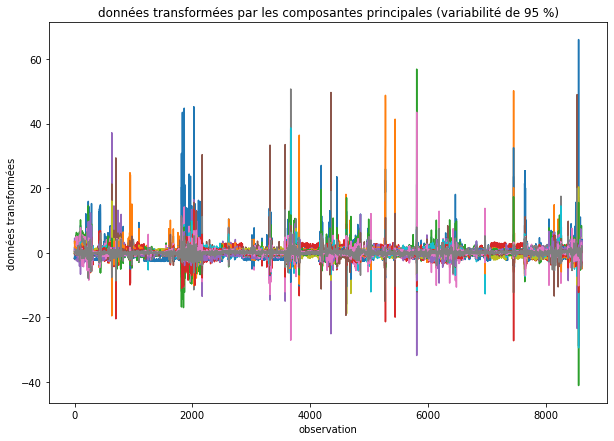

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(pca)
plt.ylabel('données transformées')
plt.xlabel('observation')
plt.title(
    'données transformées par les composantes principales (variabilité de 95 %)')
plt.show()


In [14]:
# copier les 3 composantes dans la variable vects
vects = pca_var.components_[:3]

# pd.Series : Tableau unidimensionnel avec des étiquettes d'axe
one = pd.Series(vects[0], index=data.columns)
one.sort_values(ascending=False)

# ces valeurs representent la contribution des variables initiale à la construction des composantes principales

Riboflavin_mg       0.262418
Riboflavin_USRDA    0.262418
Niacin_USRDA        0.258812
Niacin_mg           0.258812
VitB6_mg            0.240501
VitB6_USRDA         0.240501
Folate_USRDA        0.212681
Folate_mcg          0.212681
Iron_mg             0.207562
Thiamin_mg          0.204830
Thiamin_USRDA       0.204830
Zinc_mg             0.187754
Zinc_USRDA          0.187754
Magnesium_USRDA     0.166954
Magnesium_mg        0.166954
VitB12_mcg          0.147748
VitB12_USRDA        0.147748
Phosphorus_mg       0.147742
Phosphorus_USRDA    0.147742
Copper_USRDA        0.140442
Copper_mcg          0.140441
Calcium_mg          0.118451
Calcium_USRDA       0.118451
Fiber_g             0.112385
Protein_g           0.110871
VitA_mcg            0.109110
VitA_USRDA          0.109110
VitE_mg             0.099110
VitE_USRDA          0.099110
Carb_g              0.098864
Energy_kcal         0.093200
Selenium_USRDA      0.075550
Selenium_mcg        0.075550
VitC_mg             0.070313
VitC_USRDA    

In [15]:
two = pd.Series(vects[1], index=data.columns)
two.sort_values(ascending=False)

VitB12_mcg          0.359395
VitB12_USRDA        0.359395
VitA_mcg            0.338235
VitA_USRDA          0.338235
Copper_USRDA        0.306430
Copper_mcg          0.306430
Selenium_USRDA      0.133966
Selenium_mcg        0.133966
Manganese_mg        0.125244
Protein_g           0.121639
Zinc_USRDA          0.048129
Zinc_mg             0.048129
Riboflavin_mg       0.013650
Riboflavin_USRDA    0.013650
Phosphorus_mg       0.001108
Phosphorus_USRDA    0.001108
ID                 -0.004825
Fat_g              -0.017837
VitC_USRDA         -0.051677
VitC_mg            -0.051677
Niacin_USRDA       -0.058509
Niacin_mg          -0.058509
VitE_USRDA         -0.077677
VitE_mg            -0.077677
VitB6_mg           -0.082904
VitB6_USRDA        -0.082904
Magnesium_USRDA    -0.089215
Magnesium_mg       -0.089215
Iron_mg            -0.100612
Calcium_mg         -0.105701
Calcium_USRDA      -0.105701
Energy_kcal        -0.107462
Folate_USRDA       -0.130890
Folate_mcg         -0.130890
Sugar_g       

In [18]:
three = pd.Series(vects[2], index=data.columns)
three.sort_values(ascending=False)

Phosphorus_mg       0.364788
Phosphorus_USRDA    0.364788
Calcium_mg          0.297885
Calcium_USRDA       0.297885
Magnesium_mg        0.283037
Magnesium_USRDA     0.283037
Protein_g           0.149815
Energy_kcal         0.147061
Fiber_g             0.138099
Fat_g               0.136457
Selenium_USRDA      0.120648
Selenium_mcg        0.120648
Copper_mcg          0.102994
Copper_USRDA        0.102993
VitE_mg             0.047504
VitE_USRDA          0.047504
Manganese_mg        0.035311
Zinc_USRDA          0.034347
Zinc_mg             0.034347
ID                  0.027240
Iron_mg             0.014128
Carb_g              0.011156
Sugar_g            -0.036565
VitA_mcg           -0.063956
VitA_USRDA         -0.063956
VitB12_USRDA       -0.065609
VitB12_mcg         -0.065609
VitC_USRDA         -0.086795
VitC_mg            -0.086795
VitB6_mg           -0.123684
VitB6_USRDA        -0.123684
Thiamin_mg         -0.143979
Thiamin_USRDA      -0.143979
Niacin_mg          -0.145736
Niacin_USRDA  